# M-R relation
* see [results](http://nbviewer.jupyter.org/github/jpdeleon/MRrelation/tree/master/KESPRINT-C10/) generated using Wolfgang's [MRrelation](https://github.com/dawolfgang/MRrelation) based on [Wolfgang, Rogers, & Ford (2015)](https://arxiv.org/abs/1504.07557)

Other newer references for Mass-Radius relation for small planets:
* An asteroseismic view of the radius valley ([van Eylen+2017](https://arxiv.org/abs/1710.05398))
* A Gap in the Radius Distribution of Small Planets ([Fulton+2017](https://arxiv.org/abs/1703.10375))

In [1]:
from datetime import datetime as dt

dt.now()

datetime.datetime(2017, 11, 9, 13, 52, 55, 636965)

In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

In [3]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


## List of KESPRINT validated systems (K2-Campaign 10)

Data from John

In [4]:
import pandas as pd

#epic with transit+stellar parameters
df = pd.read_csv('../data/c10_per_rad_stm.csv')
df.head()

,epic,pl,p,r,r_err,st_mass
0,201092629,b,26.810369,2.10,0.10,0.705105
1,201102594,b,6.513566,2.73,0.83,0.342000
2,201110617,b,0.813101,1.49,0.70,0.624323
3,201128338,b,32.654116,2.30,0.18,0.548301
4,201132684,b,10.060960,30.05,6.26,0.903000


## Read an R-script from Python

** run only once**

## Read posterior samples for M-R

In [5]:
import pandas as pd

#epic with transit+stellar parameters
df = pd.read_csv('../data/c10_per_rad_stm.csv')

In [6]:
import numpy as np
from tqdm import tqdm

inputdir = '/home/jp/github/MRrelation/KESPRINT-C10/'

epics      = df['epic']
radii      = df['r']
pl_list    = df['pl'] #used also as key for merging later

mass_estimates = {}

sigma_minus = []
sigma_plus  = []
mean_value  = [] #mass

new_epics   = []
new_pl_list = []

for epic,pl in tqdm(zip(epics,pl_list)):
    #print(epic)
    fname = inputdir+'massrad_postpred_'+str(epic)+'.txt'
    try:
        df_mr = pd.read_csv(fname, delimiter=' ')#, dtype=float)
        #get mean mass and their 1-sigma uncertainty
        minus, median, plus =np.percentile(df_mr['masses'].values, 
                                           [16,50,84],
                                          axis=0)
        
        assert minus < median < plus
        low = median - minus
        hi  = plus - median
        
        sigma_minus.append(low)
        sigma_plus.append(hi)
        mean_value.append(median)
        
        new_epics.append(epic)
        new_pl_list.append(pl)
        
        mass_estimates[epic] = [low, median, hi]
    except Exception as e:
        print(e)

58it [00:04, 13.18it/s]


In [7]:
mass_estimates.keys()

dict_keys([201092629, 201102594, 201110617, 201128338, 201132684, 201164625, 201166680, 201211526, 201234090, 201274010, 201352100, 201386739, 201390048, 201390927, 201392505, 201437844, 201595106, 201598502, 201615463, 228707509, 228721452, 228725791, 228725972, 228729473, 228732031, 228734900, 228735255, 228736155, 228739306, 228748383, 228748826, 228753871, 228758778, 228758948, 228763938, 228798746, 228801451, 228804845, 228809391, 228809550, 228834632, 228846243, 228888935, 228894622, 228934525, 228962330, 228968232, 228974324, 228974907, 229017395, 229131722, 229133720])

Convert into dataframe:

In [8]:
df_mass = pd.DataFrame({'epic': new_epics, 
              'pl': new_pl_list,
              'm': mean_value,
              'm_err-': sigma_minus,
              'm_err+': sigma_plus})

In [9]:
df_mass.head()

,epic,m,m_err+,m_err-,pl
0,201092629,6.923203,2.322747,2.317064,b
1,201102594,9.646539,4.646259,4.308479,b
2,201110617,4.147018,3.981731,3.644689,b
3,201128338,7.779031,2.416667,2.431014,b
4,201132684,5.785783,2.847233,2.836353,b


In [10]:
len(df_mass)

58

Merge df

In [11]:
df_final = pd.merge(df_mass, df, on=['epic','pl'])
df_final.head()

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass
0,201092629,6.923203,2.322747,2.317064,b,26.810369,2.10,0.10,0.705105
1,201102594,9.646539,4.646259,4.308479,b,6.513566,2.73,0.83,0.342000
2,201110617,4.147018,3.981731,3.644689,b,0.813101,1.49,0.70,0.624323
3,201128338,7.779031,2.416667,2.431014,b,32.654116,2.30,0.18,0.548301
4,201132684,5.785783,2.847233,2.836353,b,10.060960,30.05,6.26,0.903000


In [12]:
import matplotlib.pyplot as pl
%matplotlib inline

pl.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=18

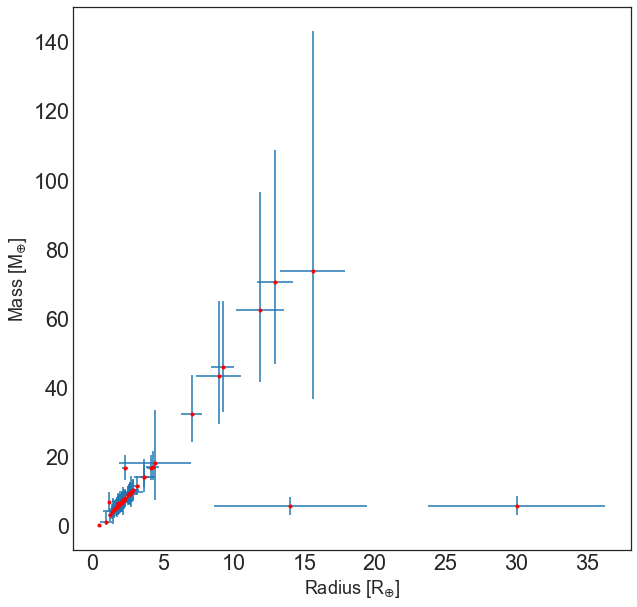

In [13]:
fig = pl.figure(figsize=(10,10))

m    = df_final['m'].values
r    = df_final['r'].values
minus= df_final['m_err-'].values
plus = df_final['m_err+'].values
rerr = df_final['r_err'].values

m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')

Check outlier:

In [14]:
df_final.query('r > 13')

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass
4,201132684,5.785783,2.847233,2.836353,b,10.060960,30.05,6.26,0.903000
24,228725791,5.674498,2.520741,2.446665,b,2.250263,14.02,5.39,0.436000
27,228729473,73.818498,69.169507,37.086720,b,16.773321,15.61,2.31,1.042014


In [15]:
name=228729473
mass_estimates[name]

[37.08672027550314, 73.818497588522604, 69.169506646225443]

In [16]:
fname = inputdir+'massrad_postpred_'+str(name)+'.txt'
df_mr = pd.read_csv(fname, delimiter=' ')
np.percentile(df_mr['masses'].values,[16,50,84])

array([  36.73177731,   73.81849759,  142.98800423])

Check in terminal if output of MRrelation is really wrong:
```Rscript scripts/run_MR.R $name 14.02 5.39
$ cd ~/github/MRrelation
$ 
```

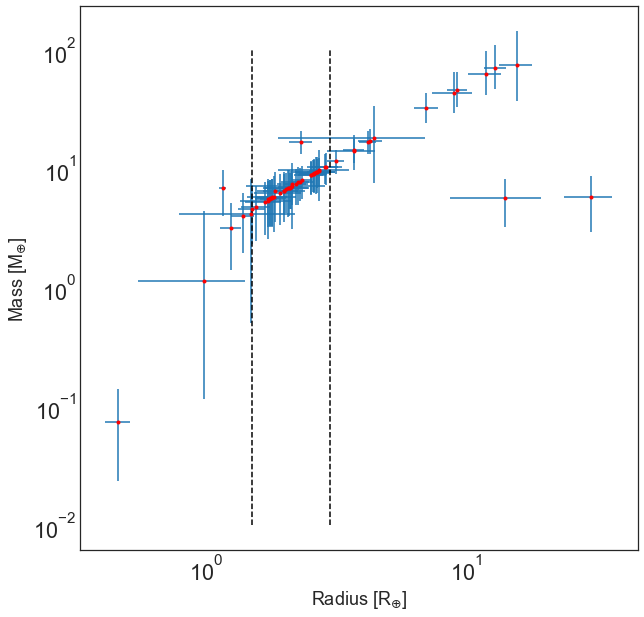

In [17]:
fig = pl.figure(figsize=(10,10))

m    = df_final['m'].values
r    = df_final['r'].values
minus= df_final['m_err-'].values
plus = df_final['m_err+'].values
rerr = df_final['r_err'].values

m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
pl.xscale('log')
pl.yscale('log')
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')

#ylims = *pl.gca().get_ylim()
ylims = [1e-2, 1e2]

#super Earth
pl.vlines(1.5, *ylims, linestyle='--')
#sub-Neptune
pl.vlines(3, *ylims, linestyle='--')

## Straddling the Fulton gap?

* [Fulton+2017](https://arxiv.org/pdf/1703.10375.pdf): 

```
We detect a factor of ≥2 deficit in the occurrence rate distribution at 1.5–2.0 R⊕. 
This gap splits the population of close-in (P < 100 d) small planets into two size regimes: 

RP < 1.5 R⊕ and RP = 2.0–3.0 R⊕, with few planets in between. 

Planets in these two regimes have nearly the same intrinsic frequency based on occurrence
measurements that account for planet detection efficiencies. 
The paucity of planets between 1.5 and 2.0 R⊕ supports the emerging picture that close-in 
planets smaller than Neptune are composed of rocky cores measuring 1.5 R⊕ or smaller with 
varying amounts of low-density gas that determine their total sizes.
```

* [van Eylen](https://arxiv.org/pdf/1710.05398.pdf):

```
We detect a clear bimodal distribution, with 
super-Earths (≈ 1.5 R⊕)and sub-Neptunes (≈ 2.5 R⊕) 
separated by a deficiency around 2 R⊕. 

We furthermore characterize the slope of the valley as a power law 
R ∝ P
γ with γ = −0.09 [+0.02 −0.04]. 

A negative slope is consistent with models of photo-evaporation, 
but not with the late formation of rocky planets in a gas-poor environment, 
which would lead to a slope of opposite sign.
The exact location of the gap further points to planet cores consisting
of a significant fraction of rocky material.
```

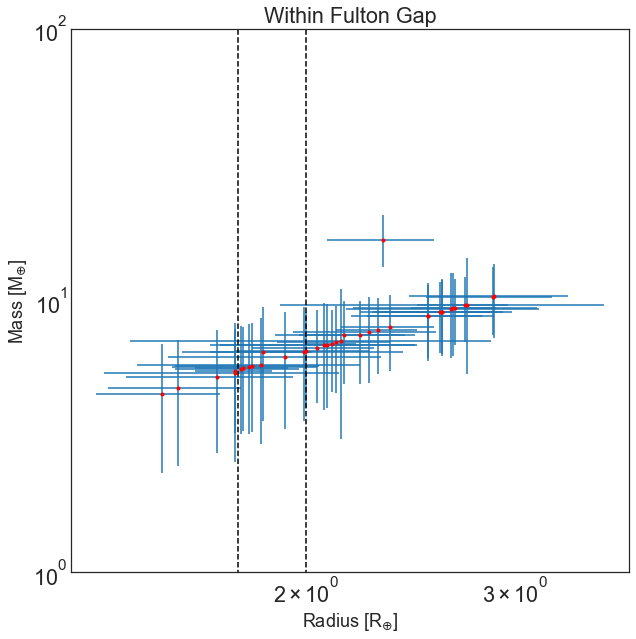

In [18]:
within_gap = df_final.query('1.5 <= r <= 3')

fig = pl.figure(figsize=(10,10))

loglog = True

m    = within_gap['m'].values
r    = within_gap['r'].values
minus= within_gap['m_err-'].values
plus = within_gap['m_err+'].values
rerr = within_gap['r_err'].values

m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
    pl.ylim(1,1e2)
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')
pl.title('Within Fulton Gap')
#super Earth
pl.vlines(1.75, *ylims, linestyle='--')
#sub-Neptune
pl.vlines(2, *ylims, linestyle='--')

## Semi-amplitude

* Equation taken from [NExSci page](https://exoplanetarchive.ipac.caltech.edu/docs/poet_calculations.html)

In [19]:
def K(period, Mp, Ms, inc=np.pi/2, ecc=0):
    '''
    period: orbital period in day
    Mp : mass of planet in Jupiter mass
    Ms : mass of star in solar mass
    
    RV semi-amplitude in m/s
    '''
    first = 203*(period)**(-1/3)
    num   = Mp*np.sin(inc)
    den   = (Ms + 9.548e-4 * Mp)**(2/3)
    third = 1/(np.sqrt(1-ecc**2))
    
    return first * num/den * third

In [20]:
import astropy.units as u

Mj = df_final['m'].values*u.Mearth.to(u.Mjup)
P  = df_final['p'].values
Ms = df_final['st_mass'].values

df_final['semi_amp'] = K(P,Mj, Ms) 

In [21]:
df_final.head()

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,semi_amp
0,201092629,6.923203,2.322747,2.317064,b,26.810369,2.10,0.10,0.705105,1.864940
1,201102594,9.646539,4.646259,4.308479,b,6.513566,2.73,0.83,0.342000,6.745694
2,201110617,4.147018,3.981731,3.644689,b,0.813101,1.49,0.70,0.624323,3.884892
3,201128338,7.779031,2.416667,2.431014,b,32.654116,2.30,0.18,0.548301,2.320374
4,201132684,5.785783,2.847233,2.836353,b,10.060960,30.05,6.26,0.903000,1.832265


## Anything interesting?

According to [wiki](https://en.wikipedia.org/wiki/Red_dwarf), 
* M0V ~ 60% Msol
* M3V ~ 36% Msol
* M9V ~ 7.5% Msol

### around M-dwarfs

In [22]:
#super Earth
within_gap = df_final.query('1.5 <= r <= 3')

within_gap.st_mass.min(), within_gap.st_mass.max()

(0.34200000000000003, 1.9099999999999999)

In [23]:
within_gap_around_Mdwarf = within_gap.query('st_mass < 0.6')
within_gap_around_Mdwarf

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,semi_amp
1,201102594,9.646539,4.646259,4.308479,b,6.513566,2.73,0.83,0.342000,6.745694
3,201128338,7.779031,2.416667,2.431014,b,32.654116,2.30,0.18,0.548301,2.320374
15,201390927,5.622397,2.363928,2.312666,b,2.637926,1.77,0.16,0.585000,3.715566
20,201598502,6.530701,2.532474,2.497709,b,7.514982,2.00,0.26,0.448000,3.637104
25,228725791,5.674498,2.520741,2.446665,c,6.491739,1.79,0.25,0.436000,3.378896
36,228758778,7.639248,2.666583,2.662171,b,9.300876,2.26,0.31,0.390000,4.346295
45,228834632,6.703678,2.509421,2.501475,b,11.729031,2.04,0.24,0.555000,2.790337
49,228934525,6.476976,2.937206,2.890880,b,3.676246,1.99,0.42,0.542021,4.031990
50,228934525,6.476976,2.937206,2.890880,c,7.954515,1.84,0.18,0.542021,3.117332


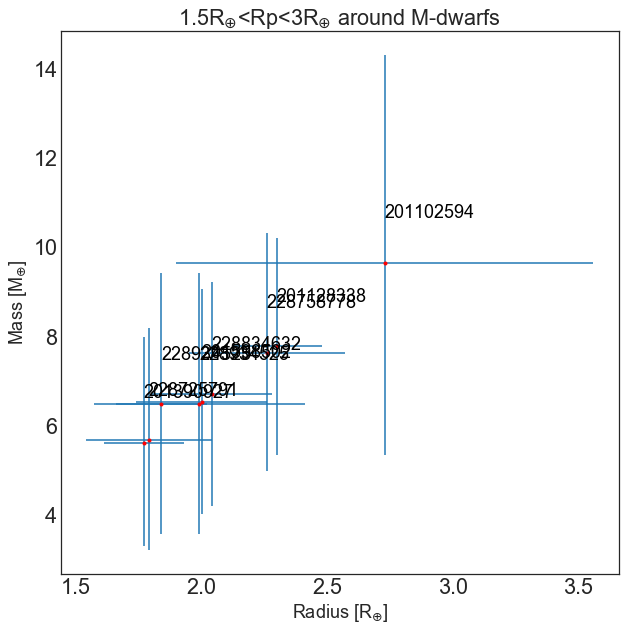

In [27]:
fig = pl.figure(figsize=(10,10))

loglog = False

m    = within_gap_around_Mdwarf['m'].values
r    = within_gap_around_Mdwarf['r'].values
minus= within_gap_around_Mdwarf['m_err-'].values
plus = within_gap_around_Mdwarf['m_err+'].values
rerr = within_gap_around_Mdwarf['r_err'].values
names= within_gap_around_Mdwarf['epic'].values
m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')
pl.title('1.5R$_{\oplus}$<Rp<3R$_{\oplus}$ around M-dwarfs')

#add names
offset=1

i=0
for x,y,n in zip(r,m,names):
    pl.text(x,y+offset,n,color='k')
    i+=1

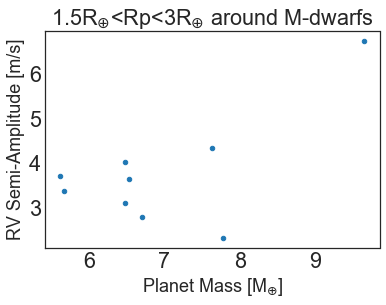

In [28]:
within_gap_around_Mdwarf.plot(x='m',y='semi_amp',kind='scatter')
pl.xlabel('Planet Mass [M$_{\oplus}$]')
pl.ylabel('RV Semi-Amplitude [m/s]')
pl.title('1.5R$_{\oplus}$<Rp<3R$_{\oplus}$ around M-dwarfs')

## Who is that outlier?

In [29]:
within_gap_around_Mdwarf.query('epic == "201128338"')

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,semi_amp
3,201128338,7.779031,2.416667,2.431014,b,32.654116,2.3,0.18,0.548301,2.320374


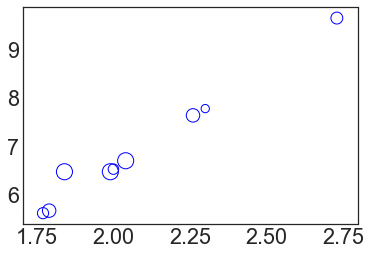

In [30]:
Ms = df_final['st_mass'].values

pl.scatter(r,m,s=Ms*200,facecolors='none', edgecolors='b')
#pl.yscale('log')

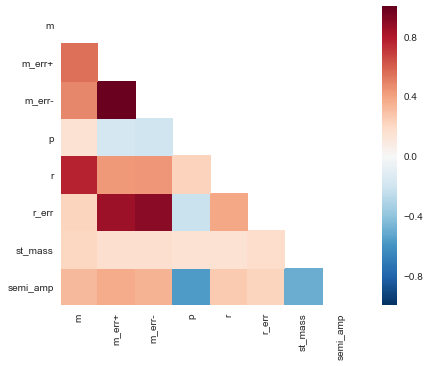

In [31]:
import seaborn as sb
sb.set_style('white')

cols = within_gap.drop(['epic','pl'],axis=1).columns

corr = within_gap[cols].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(corr, mask=mask, square=True)
         
# pl.imshow(corr)
# pl.yticks(range(len(cols)),cols);
# pl.xticks(range(len(cols)),cols, rotation=45);

## Regression

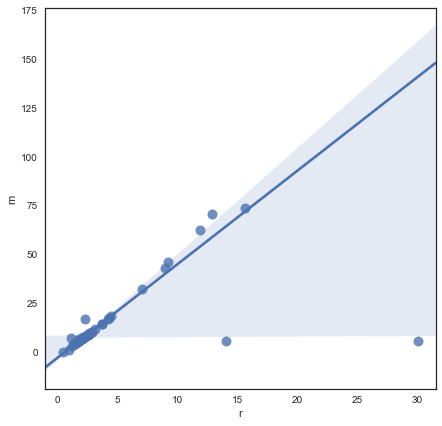

In [32]:
fig, ax = pl.subplots(figsize=(7, 7))

sb.regplot("r", "m", data=df_final, robust=True, ax=ax, scatter_kws={"s": 100})

## Regression (r<13R$_{\oplus}$)

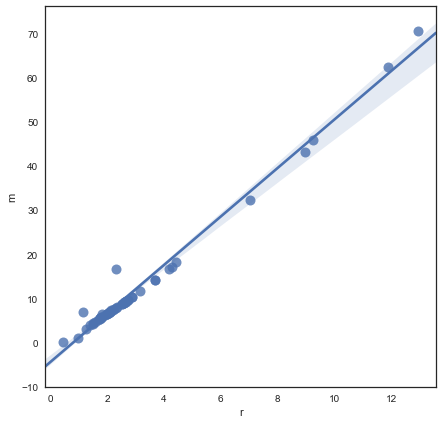

In [33]:
fig, ax = pl.subplots(figsize=(7, 7))

df_masked = df_final.query('r < 13')
rp = sb.regplot("r", "m", data=df_masked, ax=ax, scatter_kws={"s": 100})

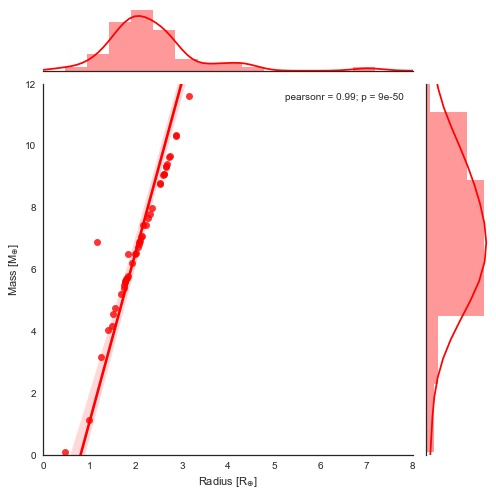

In [34]:
df_masked = df_final.query('r < 13')

g = sb.jointplot("r", "m", data=df_masked, kind="reg", size=7,
                 xlim=(0, 8), ylim=(0, 12), color="r")
g.set_axis_labels("Radius [R$_{\oplus}$]", "Mass [M$_{\oplus}$]")

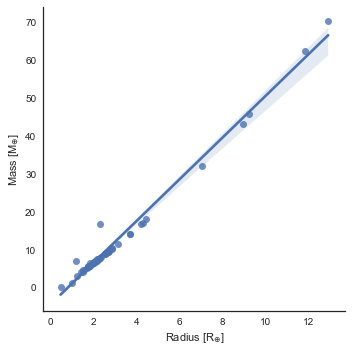

In [35]:
import seaborn as sb
sb.set_style('white')

df_masked = df_final.query('r < 13')

#add: hue='semi_amp',
g = sb.lmplot(x="r", y="m", 
               truncate=True, size=5, data=df_masked)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Radius [R$_{\oplus}$]", "Mass [M$_{\oplus}$]")
#g.set(xscale="log", yscale="log",xlim=[0.1,30])

## Fitting a power law
* See [scipy](http://scipy-cookbook.readthedocs.io/items/FittingData.html)

* van Eylen: R = P^−0.09 [+0.02 −0.04]

## Save df

In [36]:
df_final.to_csv('final_results.csv')